<a href="https://colab.research.google.com/github/Arthi2303A51595/AIML-2025/blob/main/2303A51595_B_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""Prediction of You Tube Spams in Music content
Q1.Identify the top 5 spam music videos of KatyPerry ?
Q2.Name the music singer with the highest spam content on YoouTube?
Q3. Identify the total number of Music Video with max and min spam content?
Q4.Name the date when most spam content was produced and by which singer?
Q5.Name the singer and song most watched in YoutTube?"""

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
file_path = '/content/youtube_data.csv'  # File path of the uploaded dataset
df = pd.read_csv(file_path)
print(df)

                                COMMENT_ID          AUTHOR  \
0    z13uwn2heqndtr5g304ccv5j5kqqzxjadmc0k    Corey Wilson   
1    z124jvczaz3dxhnbc04cffk43oiugj25yzo0k     Epic Gaming   
2        z13tczjy5xj0vjmu5231unho1ofey5zdk       LaS Music   
3    z13tzr0hdpnayhqqc04cd3zqqqjkf3ngckk0k      Cheryl Fox   
4    z12pcvix4zedcjvyb04ccr1r0mr2g5xwyng0k      PATRICK_TW   
..                                     ...             ...   
433      z13lvr4iupatjlrem231yvpxolzvspwdl      Salty Croc   
434  z12lxhrqdkyusbkji04cihtrvn3jvxnqszg0k       Bob Orton   
435      z12xhdjrsxm3v550w22oynsjrnmvjhkvj  LuckyMusiqLive   
436      z13msngo3qvwx1ym223pehqgouexzdmnm  xXxPWND 420xXx   
437    z120hptrylzqzdsoj04cepaonmuyyr1afj0  Matheus Macedo   

                           DATE  \
0    2015-05-28T21:39:52.376000   
1    2015-05-28T20:07:20.610000   
2    2015-05-28T19:23:35.355000   
3    2015-05-28T17:49:35.294000   
4    2015-05-28T16:28:26.818000   
..                          ...   
433  2014-

In [46]:
print("Dataset Head:\n", df.head())
print("\nDataset Info:")
print(df.info())
print("\nMissing Values:\n", df.isnull().sum())

Dataset Head:
                               COMMENT_ID        AUTHOR  \
0  z13uwn2heqndtr5g304ccv5j5kqqzxjadmc0k  Corey Wilson   
1  z124jvczaz3dxhnbc04cffk43oiugj25yzo0k   Epic Gaming   
2      z13tczjy5xj0vjmu5231unho1ofey5zdk     LaS Music   
3  z13tzr0hdpnayhqqc04cd3zqqqjkf3ngckk0k    Cheryl Fox   
4  z12pcvix4zedcjvyb04ccr1r0mr2g5xwyng0k    PATRICK_TW   

                         DATE  \
0  2015-05-28T21:39:52.376000   
1  2015-05-28T20:07:20.610000   
2  2015-05-28T19:23:35.355000   
3  2015-05-28T17:49:35.294000   
4  2015-05-28T16:28:26.818000   

                                             CONTENT  CLASS  
0  <a href="http://www.youtube.com/watch?v=KQ6zr6...      0  
1                                   wierd but funny﻿      0  
2  Hey guys, I&#39;m a human.<br /><br /><br />Bu...      1  
3       Party Rock....lol...who wants to shuffle!!!﻿      0  
4                                        Party rock﻿      0  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 

In [47]:
print("\nSummary Statistics:\n", df.describe())


Summary Statistics:
             CLASS
count  438.000000
mean     0.538813
std      0.499061
min      0.000000
25%      0.000000
50%      1.000000
75%      1.000000
max      1.000000


In [48]:
print("\nSpam Comment Distribution:")
print(df['CLASS'].value_counts())


Spam Comment Distribution:
CLASS
1    236
0    202
Name: count, dtype: int64


<ipython-input-49-1677ded765e3>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='CLASS', palette='Set2')


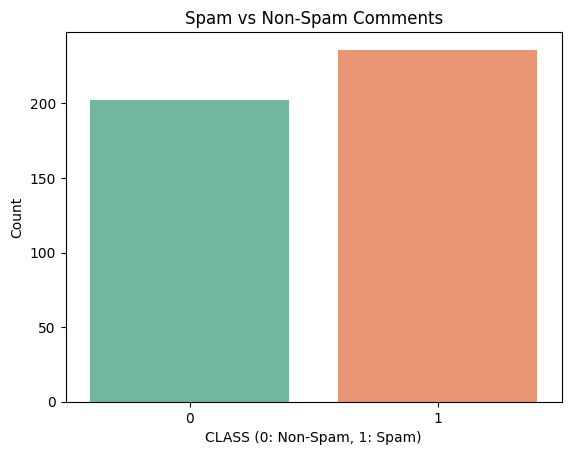

In [49]:
sns.countplot(data=df, x='CLASS', palette='Set2')
plt.title("Spam vs Non-Spam Comments")
plt.xlabel("CLASS (0: Non-Spam, 1: Spam)")
plt.ylabel("Count")
plt.show()

In [50]:
from sklearn.feature_extraction.text import CountVectorizer

In [51]:
spam_comments = df[df['CLASS'] == 1]['CONTENT']

In [52]:
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(spam_comments)

In [53]:
spam_words = np.array(vectorizer.get_feature_names_out())
spam_word_counts = np.array(X.sum(axis=0)).flatten()

In [54]:
common_spam_words = pd.DataFrame({'Word': spam_words, 'Count': spam_word_counts})
common_spam_words = common_spam_words.sort_values(by='Count', ascending=False).head(10)

In [ ]:
print("\nTop 10 Common Spam Words:\n", common_spam_words)

<ipython-input-55-7da27b520a96>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=common_spam_words, x='Count', y='Word', palette='viridis')


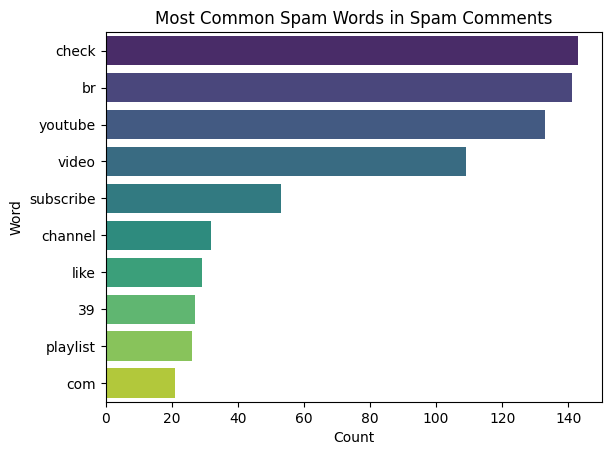

In [55]:
sns.barplot(data=common_spam_words, x='Count', y='Word', palette='viridis')
plt.title("Most Common Spam Words in Spam Comments")
plt.xlabel("Count")
plt.ylabel("Word")
plt.show()

In [57]:
processed_file_path = '/content/youtube_data.csv'
df.to_csv(processed_file_path, index=False)
print(f"Processed data saved as '{processed_file_path}'.")

Processed data saved as '/content/youtube_data.csv'.
